# Practical 3: Artificial Neural Network

This is the first task of Practical 3. You will build a neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 
You will build the classifier from scartch. 

We will mark your code based on the accuracy of your model. You should get **at least 97%** accuracy on this dataset. Don't forget to save and check in your model. 

## Import the libraries

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

# Tensorboard
%load_ext tensorboard
import tensorboard

# Scikit
from sklearn.model_selection import RandomizedSearchCV


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [253]:
tf.__version__

'2.3.0'

In [254]:
tf.keras.__version__

'2.4.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

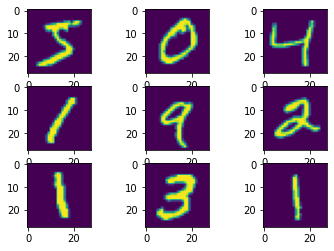

(60000, 28, 28)

In [255]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

In [256]:
# 1H
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [257]:
# Validation Data & Normalisation
np.random.seed(1154)
validation_size = 12000 # 20%
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:validation_size]], X_train_full[shuffled_indices[validation_size:]]
y_valid, y_train = y_train_full[shuffled_indices[:validation_size]], y_train_full[shuffled_indices[validation_size:]]

X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

## Build and train the model

Build and train your model. 

In [258]:
# Model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(1000, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))



In [259]:
# Loss & History
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=256, epochs=32, validation_data=(X_valid, y_valid),
                   callbacks=[keras.callbacks.TensorBoard(log_dir="logs/fit/"), early_stopping_cb])

Epoch 1/32
188/188 [==============================] - 9s 46ms/step - loss: 0.3136 - accuracy: 0.9112 - val_loss: 0.1771 - val_accuracy: 0.9509
Epoch 2/32
188/188 [==============================] - 6s 30ms/step - loss: 0.1290 - accuracy: 0.9634 - val_loss: 0.1219 - val_accuracy: 0.9645
Epoch 3/32
188/188 [==============================] - 5s 25ms/step - loss: 0.0831 - accuracy: 0.9760 - val_loss: 0.1041 - val_accuracy: 0.9691
Epoch 4/32
188/188 [==============================] - 5s 26ms/step - loss: 0.0586 - accuracy: 0.9837 - val_loss: 0.0967 - val_accuracy: 0.9712
Epoch 5/32
188/188 [==============================] - 6s 34ms/step - loss: 0.0427 - accuracy: 0.9880 - val_loss: 0.0823 - val_accuracy: 0.9737
Epoch 6/32
188/188 [==============================] - 6s 33ms/step - loss: 0.0322 - accuracy: 0.9914 - val_loss: 0.0882 - val_accuracy: 0.9728
Epoch 7/32
188/188 [==============================] - 6s 31ms/step - loss: 0.0239 - accuracy: 0.9938 - val_loss: 0.0759 - val_accuracy: 0.9767

In [260]:
# show the structure of your model
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_37 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


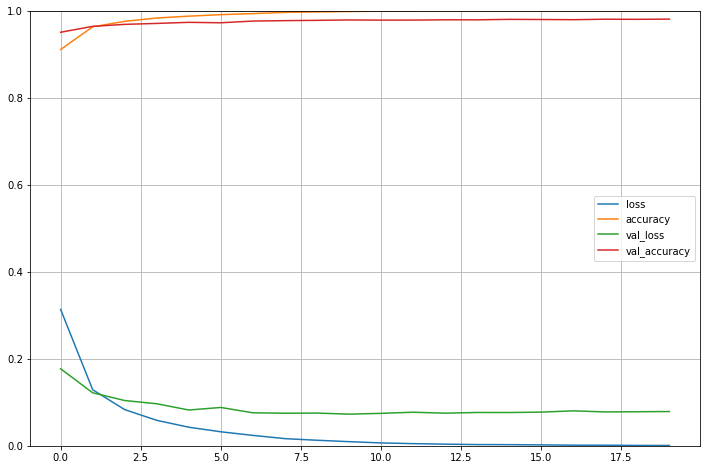

In [261]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

In [262]:
model.save('mnist.h5') 

## Load the model and evaluate it on the test data

In [263]:
model = keras.models.load_model("mnist.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0620 - accuracy: 0.9806


[0.062018878757953644, 0.9805999994277954]

In [265]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 10324), started 0:02:42 ago. (Use '!kill 10324' to kill it.)

## Short report

Please write briefly how you build and train the model. Please include the decisions you made, such as why you use x number layers, and the difficulties you met.

Report

We started with replicating the model Haozhe showed in the practical session, containing a flatten layer, two dense layers (300 and 100 neurons) and a dense output layer with 10 neurons. This model already gave us an accuracy of around 97%, but looking at our training progress (trough the plot provided and tensorboard), the validation accuracy stopped increasing after a few epochs, so we implemented an early stopper (and increased the number of epochs). The RandomizedSearchCV did not provide any useful information in this case, as all the accuracies were very close to each other. Doing some googling, we read a lot of discussion argeing about the optimal number of layers, where a general opinion seemed to be "one layer is usually enough". So we tried one layer and drastically increased our number of neurons to 1000. This and replacing the SGD with the Adam optimizer gave as an accuracy of over 98%.